### [Todo](#Todo_)
### [Description](#Description_)
### [Research](#Research_)
### [Setup](#Setup_)
### [Imports](#Imports_)
### [Config](#Config_)
### [Utils](#Utils_)
### [Data](#Data_)
### [Download](#Download_)
### [Preprocessing](#Preprocessing_)
### [Exploratory data analysis](#Exploratory_data_analysis_)
### [Metrics](#Metrics_)
### [Hand model](#Hand_model_)
### [Hand model loss](#Hand_model_loss_)
### [Dataset](#Dataset_)
### [Model](#Model_)

## Todo <span id=Todo_></span>

1. clean up todo

1. compute sequence quality, filter trashy data, learn to smooth, then cluster on smoothed labels to try to ex

1. use webcam to test online

# compute similarity to cluster via pointwise distance or learned function?
# model: input -> augment -> smooth_sequence -> normalizing_affine_transform -> conformer -> smooth_loss + ctc_loss
# manually model frame x landmark x coordinate with variable frame length fingerletters and let model use them as context
# keep finger point abs coordinates
# pad/truncate all sequences to common length
# don't limit consecutive nans
# smooth out hand model, take smooth hand model at notnan frames, encode as context for transformer cross attention
# check letter and word distributions in train phrases

1. teach model to speak in sign language in parallel to understanding it

1. masked learning

1. filter data: drop 1 frame samples, none samples

1. determine for each participant whether he is right-handed

1. distinguish between stationary and dynamic symbols

1. how to deal with transitions between symbols? If have codebook -> just match, otherwise utilize temporal attention

1. extract codes for each symbol + missing data class + transition class + intentional nothing class

1. how to distinguish word boundaries? Intentional vs unintentional nothing

determine handedness by comparing total hand variation

measure sequence quality by number of frames per letter, percent missing data after clipping inner nan spans, average jitterness by computing deltas

interpolate finger point movement via line with weakly bounded first, second derivative

detect complete finger letter by detecting finger stops / turns

utilize skeletal-muscular model of fingers to determine how fingers can move

initiate learning with simulated finger letters -> incrementally progress to more noisy samples

assign each video quality based on missing / jittering data and train on quality data first

nearest frames interpolate? -> lag predictions? several frames look ahead?

filter data: empty, too sparse, too noisy(jiggly)
learn to smooth out input via masked training

take pretrained bert, limit vocab, train conditional on gestures

can drop out a lot of columns and rows to train on other gpus

different elementwise activations instead of one per layer

what is supplemental data???

train data is prett shitty, consider using extra data

if iterating over data by parquet files -> accumulate grad batches

train model to predict missing frames / smooth out and regularize given frames

check z coordinate consistency

use mediapipe handedness evaluator?

what to do if someone switches hands during phrase?

augment frame rate during training

because person can get closer/further to/from the camera, skeletal sizes are not absolute

feature engineering:
hand orientation/position/speed/acceleration
joint 2d angles for secondary joints, 3d angles for primary
assign parent node, get vector angle from parent node relative to palm plane
get finger point vectors/ coords relative to palm, finger lenghts?
distinguish between letters with velocity/without
how to encode movement?

hand-craft pose token clusters for each letter
look for asl datasets
how to deal with missing values?
determine dominant hand online, transform left hand to right
use catboost to determine feature importance
learn codebook and predict via nearest neighbors
sample each letter individually from each phrase -> take center / cluster
how to encode letters with motion?
condition on participant id, stratify train/test on participant id

compress and expand missing rows to save memory on data transfer

Try:
1. cnn
2. cnn + transformer
3. cnn + VQ + transformer

model: cnn as feature extractor front-end, then transformer as the temporal back-end, maybe feed back predictions of previous steps?

maybe VQ: hand-crafted or learnable after or before cnn

factorize into a spacial attention model and temporal one?

ensemble via seeds, models, submodels

look through previous notebooks for training, architecture tips

swa, mix-cut, label smoothing, dropout, pathcut?, stochastic depth, masking, augmentations

train using pseudo noisy student, progressively reducing the hand model smoothing and using noisier data, while reducing learning rate

take a page from SpecAugment time warping, masking

use conformer-like architecture

## Description <span id=Description_></span>




- [American manual alphabet on Wikipedia](https://en.wikipedia.org/wiki/American_manual_alphabet)

<div style="text-align: center;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Asl_alphabet_gallaudet.svg" width="300">
</div>

<div style="text-align: center;">
  <img src="https://developers.google.com/static/mediapipe/images/solutions/hand-landmarks.png" width="600">
</div>

<div style="text-align: center;">
    <img src="https://mediapipe.dev/images/mobile/hand_crops.png" width="600">
  <img src="https://www.researchgate.net/profile/Viktor-Kotiuk/publication/295677869/figure/fig1/AS:636380862496769@1528736429147/Anteroposterior-X-ray-image-of-the-hand-with-quantities-measured-I-V-finger-index.png" width="300">
</div>


- [Competition](https://www.kaggle.com/competitions/asl-fingerspelling)

#### Dataset Summary

The ASL Fingerspelling Recognition Corpus (version 1.0) is a collection of hand and facial landmarks generated by Mediapipe version 0.9.0.1 on videos of phrases, addresses, phone numbers, and urls fingerspelling by over 100 deaf signers.

#### Source Data

##### Initial Data Collection and Normalization

Signers who communicate using American Sign Language as their primary language were recruited from across the United States. They were shipped a smartphone with an installed data collection app. The app prompted the signer with the English text to sign. Signers pressed an on-screen button on the phone to begin and end the recording of video during which they fingerspelled the on screen text. The video clip boundaries were adjusted to contain video around the fingerspelling, but this process was not perfectly accurate.

The fingerspelling contains a high degree of co-articulation and even lexicalization of full words. Meaning, the letter handshapes are modified based on what comes before or after. Many variations of handshapes are used to convey meaning. Many different body poses, zoom levels, appearances, and accessories are present in the dataset. Signers could use either their left or right hand to produce fingerspelling, and many even switched between hands in different clips.

The signers were shown text which included capitalization, however, most signers chose not to convey the capitalization within their fingerspelled responses. Some signers conveyed the capitalizations using several different methods, most commonly with one of three methods. Using a curled-L handshape (perhaps with motion to indicate the entire word is capitalized) before the letter to be capitalized, by physically placing the capitalized letters higher in space than the lower case letters, or by shaking the letter's handshape a little bit to indicate it is capitalized. This dataset does not attempt to evaluate the detection of capitalization, and all target phrases are lower case.

#### Annotations

##### Annotation process

Each video was annotated at creation time by the smartphone app. Videos were filtered, modified and clip boundaries assigned through a largely automatic process which corrected many issues in the underlying raw data. Incorrect clip boundaries are the most prevalent remaining issue in the data samples. Little judgment was made on the correctness or quality of the fingerspelling itself.

#### Evaluation

The evaluation metric for this contest is the normalized total levenshtein distance. Let the total number of characters in all of the labels be N and the total levenshtein distance be D. The metric equals (N - D) / N.

#### This is a Code Competition

Submissions to this competition must be made through Notebooks. In order for the "Submit" button to be active after a commit, the following conditions must be met:

- CPU Notebook <= 9 hours run-time
- GPU Notebook <= 9 hours run-time
- Internet access disabled
- Freely & publicly available external data is allowed, including pre-trained models
- Submission file must be named submission.zip

#### Submission Process

In this competition you will be submitting a TensorFlow Lite model file. The model must take one or more landmark frames as an input and return a float vector (the predicted probabilities of each sign class) as the output. Your model must be packaged into a submission.zip file and compatible with the TensorFlow Lite Runtime v2.14.0, which we are running using Python 3.10. You are welcome to train your model using the framework of your choice, as long as you convert the model checkpoint into the tflite format prior to submission.

Your model must also perform inference in less than 5 hours and use less than 40 MB of storage space. Expect to see approximately 35 hours of video in the test set.

Each video is loaded with the following function:

```python
def load_relevant_data_subset(pq_path):
    return pd.read_parquet(pq_path, columns=selected_columns)
```

If you want to load only a subset of the landmarks, include a file named inference_args.json in your submission.zip with the field selected_columns containing a list of the landmark columns you want to use. If that is not included we will load all columns.

Inference is performed (roughly) as follows, ignoring details like how we manage multiple videos:

```python
import tflite_runtime.interpreter as tflite
interpreter = tflite.Interpreter(model_path)

REQUIRED_SIGNATURE = "serving_default"
REQUIRED_OUTPUT = "outputs"

with open ("/kaggle/input/fingerspelling-character-map/character_to_prediction_index.json", "r") as f:
    character_map = json.load(f)
rev_character_map = {j:i for i,j in character_map.items()}

found_signatures = list(interpreter.get_signature_list().keys())

if REQUIRED_SIGNATURE not in found_signatures:
    raise KernelEvalException('Required input signature not found.')

prediction_fn = interpreter.get_signature_runner("serving_default")
output = prediction_fn(inputs=frames)
prediction_str = "".join([rev_character_map.get(s, "") for s in np.argmax(output[REQUIRED_OUTPUT], axis=1)])
```

## Research <span id=Research_></span>

- [Quickstart notebook](https://www.kaggle.com/code/gusthema/asl-fingerspelling-recognition-w-tensorflow/notebook)
- [Competetion discussion summary](https://www.kaggle.com/competitions/asl-fingerspelling/discussion/421761)
- [Asl-signs competetion first place: 1DCNN with Transformer](https://www.kaggle.com/competitions/asl-signs/discussion/406684)
- [Asl-signs competetion second place: data augmentation, CNN and Transformer ensemble](https://www.kaggle.com/competitions/asl-signs/discussion/406306)

- [MS-ASL dataset and experiments](https://arxiv.org/pdf/1812.01053v2.pdf)
- [I3D (2018): overview of video classification methods, such as conv2d + optical flow + LSTM, conv3d](https://arxiv.org/pdf/1705.07750.pdf)
- [Semi-supervised learning for speech recognition (2022): mix labeled and unlabeled data, iteratively train student models with conformer architecture](https://arxiv.org/pdf/2010.10504v2.pdf)
- [CTC loss](https://distill.pub/2017/ctc/)
- [wav2vec 2.0 (2020): learning audio encodings via masked pretraining, conv + VQ + transformer](https://arxiv.org/pdf/2006.11477.pdf)
- [Token Learner: simple spacial attention based feature extractor](https://openreview.net/pdf?id=z-l1kpDXs88)
- [Whisper (2022): robust speech recognition via large-scale weak supervision with transformer](https://arxiv.org/pdf/2212.04356.pdf)
- [Stochastic depth regularization](https://arxiv.org/pdf/1603.09382.pdf)
- [Noisy student: iteratively train larger model on unlabeled data using previous model's predictions as target](https://arxiv.org/pdf/1911.04252v4.pdf)
- [SpecAugment: speech recognition augmentation via time warping, block masking](https://arxiv.org/pdf/1904.08779v3.pdf)
- [Squeeze-and-excite: an attention-like layer for cnns](https://arxiv.org/pdf/1709.01507.pdf)
- [ContextNet (2020): squeeze-and-excite cnn](https://arxiv.org/pdf/2005.03191.pdf)
- [Conformer (2020): cnn and transformer fusion](https://arxiv.org/pdf/2005.08100.pdf)
- [Recording of ml audio study group](https://www.youtube.com/watch?v=D-MH6YjuIlE)
- [Outlier detection in time series](https://s-ai-f.github.io/Time-Series/outlier-detection-in-time-series.html)
- [Hand proportions](https://scielo.conicyt.cl/pdf/ijmorphol/v28n3/art15.pdf)

- https://huggingface.co/docs/transformers/tasks/asr

- [Hidden-state Conditional Random Fields paper](https://www.cs.upc.edu/~aquattoni/AllMyPapers/pami_07.pdf)
- [American Sign Language Recognition paper](https://pdfs.semanticscholar.org/9311/469060376731a780811d6a7d52a4ea3a57e7.pdf?_gl=1*h6srw4*_ga*MTI1MTM3MjcuMTY4OTQxMjU0OA..*_ga_H7P4ZT52H5*MTY4OTQxMjU0OC4xLjAuMTY4OTQxMjU1MS41Ny4wLjA.)
- [Classifying ASL images via mediapipe](https://www.cortic.ca/post/classifying-american-sign-language-alphabets-on-the-oak-d)
- [Overview of VQ methods](https://towardsdatascience.com/optimizing-vector-quantization-methods-by-machine-learning-algorithms-77c436d0749d)
- [VQVAE paper](https://arxiv.org/pdf/1711.00937.pdf)
- [VQVAE implementation](https://colab.research.google.com/github/zalandoresearch/pytorch-vq-vae/blob/master/vq-vae.ipynb)
- [VQ package](https://github.com/lucidrains/vector-quantize-pytorch)
- [Video Question Answering with Iterative Video-Text Co-Tokenization: condition video processing model on the question being asked](https://arxiv.org/pdf/2208.00934.pdf)
- [AUTO-AVSR (2023): audio-visual speech recognition via training on automatically generated labels](https://arxiv.org/pdf/2303.14307v3.pdf)

## Setup <span id=Setup_></span>

In [1]:
def check_python_version(expected_version: str):
    python_version = !python --version
    if python_version[0] != expected_version:
        print(
            f"Expected python version `{expected_version}`, found `{python_version[0]}`."
        )

In [2]:
check_python_version("Python 3.10.7")

!pip install -qqq einops mediapipe editdistance

## Imports <span id=Imports_></span>

In [3]:
import collections
import contextlib
import dataclasses
import editdistance
import einops
import enum
import functools
import glob
import IPython
import imageio
import itertools
import json
import matplotlib.pyplot as plt
import mediapipe
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import os
import pandas as pd
import PIL
import PIL.ImageDraw
import pyarrow.parquet as pq
import pytorch_lightning as pl
import scipy
import scipy.interpolate
import sklearn.model_selection
import sys
import tempfile
import time
import torch
import torch.nn as nn
import tqdm.auto
import typing as tp
import wandb

T = tp.TypeVar("T")

## Config <span id=Config_></span>

In [4]:
@dataclasses.dataclass(kw_only=True)
class Config:
    competition: str = "asl-fingerspelling"
    data_folder: str = "data"
    debug: bool = True
    download: bool = False
    aggregated_meta_filename: str = "aggregated_meta.parquet"
    aggregated_hand_filename: str = "aggregated_hand.parquet"

## Utils <span id=Utils_></span>

In [5]:
def make_new_markdown_section_with_link(section: str, header_size: int = 2):
    header = "#" * header_size
    section_id = section.replace(" ", "_") + "_"
    section_link = f"{header} [{section}](#{section_id})"
    section_header = f"{header} {section} <span id={section_id}></span>"
    return section_link, section_header


def batched(iterable, n) -> tp.Generator[list, None, None]:
    """
    Batch data into tuples of length n. The last batch may be shorter.

    batched('ABCDEFG', 3) --> ABC DEF G
    """
    if n < 1:
        raise ValueError("n must be at least one.")

    it = iter(iterable)
    while batch := list(itertools.islice(it, n)):
        yield batch


def write_gif(uri: str, images: np.ndarray, fps=30) -> None | bytes:
    encoded_image = imageio.v3.imwrite(uri, images, loop=0, duration=len(images) / fps)
    return encoded_image


def display_video(video: np.ndarray):
    with tempfile.NamedTemporaryFile(suffix=".gif") as gif:
        filename = gif.name
        write_gif(filename, video)
        IPython.display.display(IPython.display.Image(filename))


def pad_dim_to_size(
    tensor: torch.Tensor,
    target_size: int,
    dim: int = 0,
    value: float = 0.0,
    truncate: bool = True,
) -> torch.Tensor:
    pad_size = max(0, target_size - tensor.shape[dim])
    pad = [0] * 2 * tensor.ndim
    pad[-(2 * dim + 1)] = pad_size
    tensor = nn.functional.pad(tensor, pad=pad, value=value)
    if truncate:
        tensor = tensor.narrow(dim=dim, start=0, length=target_size)
    return tensor


@contextlib.contextmanager
def timeit(name: str = "", file=sys.stderr):
    begin = time.perf_counter()
    yield
    end = time.perf_counter()
    name = name or name + ":\t"
    delta_ms = 1000 * (end - begin)
    print(f"{name}{delta_ms:.3f} ms", file=file)


def set_tokenizers_parallelism(enable: bool):
    os.environ["TOKENIZERS_PARALLELISM"] = "true" if enable else "false"


def set_torch_device_order_pci_bus():
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"


def mkdir(path, error_if_exists=False):
    !mkdir {"-p" if not error_if_exists else ""} {path}


def unzip(zip_path, save_path=None, delete_zip=False):
    !unzip {zip_path} {"-d "+ save_path if save_path else ""}
    if delete_zip:
        for path in glob.glob(zip_path):
            if path.endswith(".zip"):
                !trash {path}


def kaggle_competitions_download_file(competition: str, filename: str, save_path: str):
    relative_filename = os.path.join(save_path, filename)
    save_path = os.path.join(save_path, os.path.split(filename)[0])
    if os.path.exists(relative_filename):
        print(f"File `{relative_filename}` already exists.")
    else:
        !kaggle competitions download {competition} -f {filename} -p {save_path}
        zip_relative_filename = relative_filename + ".zip"
        if os.path.exists(zip_relative_filename):
            unzip(zip_relative_filename, save_path=save_path, delete_zip=True)
            

def load_if_exists_else_build_and_save(
    path: str, load: tp.Callable[[str], T], build_and_save: tp.Callable[[str], T]
) -> T:
    if os.path.exists(path):
        print(f"Reusing file {path}", file=sys.stderr)
        return load(path)
    return build_and_save(path)


def normalize(tensor: torch.Tensor, dim: int = -1) -> torch.Tensor:
    norm = tensor.norm(dim=dim, keepdim=True)
    tensor = tensor / torch.maximum(norm, torch.tensor(1e-10))
    return tensor

## Data <span id=Data_></span>

In [6]:
def get_default_data_folder() -> str:
    return Config.data_folder

def get_aggregated_meta_filename() -> str:
    return Config.aggregated_meta_filename

def get_aggregated_hand_filename() -> str:
    return Config.aggregated_hand_filename


def read_character_to_prediction_index(folder: str | None = None) -> dict[str, int]:
    folder = folder or get_default_data_folder()
    path = os.path.join(folder, "character_to_prediction_index.json")
    character_to_prediction_index = json.load(open(path))
    return character_to_prediction_index


def read_meta_dataframe(
    folder: str | None = None,
    filename: tp.Literal["train.csv", "supplemental_metadata.csv"] = "train.csv",
) -> pd.DataFrame:
    folder = folder or get_default_data_folder()
    dataframe = pd.read_csv(os.path.join(folder, filename))
    dataframe = dataframe.set_index("sequence_id")
    return dataframe


def read_parquet_as_dataframe(
    parquet_path: str,
    folder: str | None = None,
    columns: list[str] | None = None,
    sequence_ids: list[int] | None = None,
) -> pd.DataFrame:
    folder = folder or get_default_data_folder()
    if sequence_ids is None:
        filters = None
    else:
        filters = [("sequence_id", "in", sequence_ids)]
    dataframe = pd.read_parquet(
        path=os.path.join(folder, parquet_path),
        columns=columns,
        filters=filters,
    )
    return dataframe

In [8]:
class Coordinate(enum.Enum):
    x = "x"
    y = "y"
    z = "z"


class Bodypart(enum.Enum):
    face = "face"
    pose = "pose"
    left_hand = "left_hand"
    right_hand = "right_hand"

    def __len__(self):
        match self:
            case Bodypart.face:
                return 468
            case Bodypart.pose:
                return 33
            case Bodypart.left_hand:
                return 21
            case Bodypart.right_hand:
                return 21

    def get_landmark_connections(self) -> frozenset[tuple[int, int]]:
        """Returns (parent, child) landmark graph edges."""
        match self:
            case Bodypart.face:
                return mediapipe.solutions.face_mesh_connections.FACEMESH_CONTOURS
            case Bodypart.pose:
                return mediapipe.solutions.pose_connections.POSE_CONNECTIONS
            case Bodypart.left_hand:
                return mediapipe.solutions.hands_connections.HAND_CONNECTIONS
            case Bodypart.right_hand:
                return mediapipe.solutions.hands_connections.HAND_CONNECTIONS

    def get_drawing_style(self):
        match self:
            case Bodypart.face:
                return (
                    mediapipe.solutions.drawing_styles.get_default_face_mesh_tesselation_style()
                )
            case Bodypart.pose:
                return (
                    mediapipe.solutions.drawing_styles.get_default_pose_landmarks_style()
                )
            case Bodypart.left_hand:
                return (
                    mediapipe.solutions.drawing_styles.get_default_hand_landmarks_style()
                )
            case Bodypart.right_hand:
                return (
                    mediapipe.solutions.drawing_styles.get_default_hand_landmarks_style()
                )


def to_parquet_column_name(
    coordinate: Coordinate, bodypart: Bodypart, landmark_id: int
) -> str:
    column_name = f"{coordinate.name}_{bodypart.name}_{landmark_id}"
    return column_name


def get_all_bodypart_columns(bodypart: Bodypart) -> list[str]:
    """
    Returns list of columns associated with given bodypart sorted by landmark id,
    then by coordinate name in alphabetical order: x -> y -> z.
    """
    bodypart_columns = []
    for landmark_id in range(len(bodypart)):
        for coordinate in Coordinate:
            column = to_parquet_column_name(
                coordinate=coordinate,
                bodypart=bodypart,
                landmark_id=landmark_id,
            )
            bodypart_columns.append(column)
    return bodypart_columns

## Download <span id=Download_></span>

In [9]:
def download_parquet_files(
    parquet_files: list[str],
    columns: list[str] | None = None,
    competition=Config.competition,
    save_path=Config.data_folder,
):
    for filename in parquet_files:
        kaggle_competitions_download_file(
            competition=competition,
            filename=filename,
            save_path=save_path,
        )
        df = read_parquet_as_dataframe(filename, columns=columns)
        df.to_parquet(os.path.join(save_path, filename))

In [10]:
if Config.download:
    mkdir(Config.data_folder)

    for filename in [
        "character_to_prediction_index.json",
        "train.csv",
        "supplemental_metadata.csv",
    ]:
        kaggle_competitions_download_file(
            competition=Config.competition,
            filename=filename,
            save_path=Config.data_folder,
        )

    columns = (
        ["frame"]
        + get_all_bodypart_columns(Bodypart.right_hand)
        + get_all_bodypart_columns(Bodypart.left_hand)
    )
    for meta_filename in ["train.csv", "supplemental_metadata.csv"]:
        download_parquet_files(
            parquet_files=read_meta_dataframe(filename=meta_filename)["path"].unique(),
            columns=columns,
        )

## Preprocessing <span id=Preprocessing_></span>

In [11]:
# def normalizing_affine_transform(
#     hand_sequence: torch.Tensor,
#     origin_node: int = 0,
#     first_basis_node: int = 5,
#     first_second_basis_node: int = 17,
# ) -> torch.Tensor:
#     """
#     Scale, translate and rotate hand landmark sequence to transform
#     origin_node into (0, 0, 0), first_basis_node into (1, 0, 0) and
#     first_second_basis_node into (a, b, 0), where a**2 + b**2 = 1.
#     """
#     basis_bone_length = (
#         hand_sequence[:, [origin_node]] - hand_sequence[:, [first_basis_node]]
#     ).norm(dim=-1, keepdim=True)
#     hand_sequence /= basis_bone_length

#     hand_sequence -= hand_sequence[:, [origin_node]]

#     first_basis = hand_sequence[:, first_basis_node]
#     x = hand_sequence[:, first_second_basis_node]
#     second_basis = x - first_basis * (first_basis * x).sum(dim=-1, keepdim=True)
#     second_basis /= second_basis.norm(dim=-1, keepdim=True)
#     third_basis = torch.cross(first_basis, second_basis, dim=1)
#     rotation = torch.inverse(
#         torch.stack([first_basis, second_basis, third_basis], dim=1)
#     )
#     hand_sequence @= rotation

#     assert torch.isclose(rotation.det(), torch.tensor(1.0), atol=1e-3).all(), (
#         rotation,
#         rotation.det(),
#     )
#     assert torch.isclose(hand_sequence[:, origin_node], torch.tensor(0.0)).all()
#     assert torch.isclose(
#         hand_sequence[:, first_basis_node].norm(dim=-1), torch.tensor(1.0)
#     ).all()
#     assert torch.isclose(
#         hand_sequence[:, first_second_basis_node, -1], torch.tensor(0.0), atol=1e-6
#     ).all(), hand_sequence[:, first_second_basis_node, -1]

#     return hand_sequence


# def hand_sequence_dataframe_normalizing_affine_transform(
#     hand_sequence_df: pd.DataFrame,
# ) -> pd.DataFrame:
#     hand_sequence_df = hand_sequence_df.copy()
#     notna_mask = hand_sequence_df.notna().all(axis="columns")
#     n_notna = notna_mask.sum()
#     if not n_notna:
#         return hand_sequence_df

#     sequence = torch.tensor(hand_sequence_df[notna_mask].values).reshape(n_notna, -1, 3)
#     sequence = normalizing_affine_transform(sequence)
#     hand_sequence_df[notna_mask] = sequence.flatten(start_dim=1, end_dim=2).numpy()
#     return hand_sequence_df

In [12]:
def get_mask_with_truncated_nan_rows(
    dataframe: pd.DataFrame, max_inner_nan_span: int | None = None
) -> pd.Series:
    """Drop leading and trailing nans and limit inner nan spans."""
    mask = pd.Series(data=False, index=dataframe.index)
    if (first_valid_index := dataframe.first_valid_index()) is not None:
        mask.loc[first_valid_index : dataframe.last_valid_index()] = True
    mask &= dataframe.ffill(limit=max_inner_nan_span).notna().all(1)
    return mask


def compute_hand_landmarks_total_temporal_std(
    hand_sequence_df: pd.DataFrame,
) -> pd.Series:

    hand_delta = hand_sequence_df.iloc[:, 1:] - hand_sequence_df.iloc[:, :-1].values
    hand_std = hand_delta.groupby("sequence_id").agg(np.nanstd).mean(axis="columns")
    hand_std = hand_std.fillna(0)
    
    hand_sequence_notna = hand_sequence_df.notna().all(axis="columns")
    n_not_na_frames = hand_sequence_notna.groupby("sequence_id").sum()
    
    total_hand_std = n_not_na_frames * hand_std
    return total_hand_std


def estimate_right_handedness_probability(sequence_df: pd.DataFrame) -> pd.Series:
    left_hand_total_std = compute_hand_landmarks_total_temporal_std(
        sequence_df[get_all_bodypart_columns(Bodypart.left_hand)]
    )
    right_hand_total_std = compute_hand_landmarks_total_temporal_std(
        sequence_df[get_all_bodypart_columns(Bodypart.right_hand)]
    )
    probability = 1 / (
        1 + np.exp(-np.maximum(-100, right_hand_total_std - left_hand_total_std))
    )
    return probability

In [13]:
# def preprocess_sequence_dataframe(
#     sequence_df: pd.DataFrame,
#     max_inner_nan_span: int | None = None,
#     target_len: int | None = None,
# ) -> dict[str, torch.Tensor]:
#     """
#     Truncate nans, determine dominant hand, mirror left handed sequences,
#     linearly interpolate nans, pad to target length, return not nan mask.
#     """
#     right_handedness_prob = estimate_right_handedness_probability(sequence_df)
#     is_right_handed = right_handedness_prob.item() > 0.5

#     bodypart = Bodypart.right_hand if is_right_handed else Bodypart.left_hand
#     hand_columns = get_all_bodypart_columns(bodypart)

#     sequence_df = sequence_df[
#         get_mask_with_truncated_nan_rows(
#             sequence_df[hand_columns], max_inner_nan_span=max_inner_nan_span
#         )
#     ]
#     sequence = sequence_df[hand_columns]
#     mask = torch.from_numpy(sequence.notna().all(axis="columns").values)

#     sequence = sequence.interpolate(method="linear")
#     sequence = torch.from_numpy(sequence.values)
#     sequence = sequence.reshape(len(sequence_df), -1, 3)
#     if not is_right_handed:
#         sequence[:, :, 0] = 1 - sequence[:, :, 0]

#     target_len = len(sequence) if target_len is None else target_len
#     pad_size = max(0, target_len - len(sequence))
#     sequence = pad_dim_to_size(sequence, target_size=target_len)

#     frame_ids = torch.from_numpy(sequence_df["frame"].values)

#     return dict(
#         sequence=sequence,
#         frame_ids=pad_dim_to_size(frame_ids, target_size=target_len),
#         is_flipped=not is_right_handed,
#         mask=pad_dim_to_size(mask, target_size=target_len),
#         size=len(sequence_df),
#     )

In [16]:
def aggregate_meta_and_hand_data(
    max_inner_nan_span:int = 3,
    folder: str | None = None,
    save:bool = False,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    meta_dfs = []
    for meta_filename, kind in zip(["train.csv", "supplemental_metadata.csv"], ["train", "supplemental"]):
        df = read_meta_dataframe(filename=meta_filename, folder=folder)
        df["kind"] = kind
        meta_dfs.append(df)
    meta_df = pd.concat(meta_dfs)
    
    right_columns = get_all_bodypart_columns(Bodypart.right_hand)
    left_columns = get_all_bodypart_columns(Bodypart.left_hand)
    columns = ["frame"] + right_columns + left_columns
    
    hand_dfs = []
    for parquet_path in meta_df["path"].unique():
        df = read_parquet_as_dataframe(parquet_path=parquet_path, folder=folder, columns=columns)
        hand_dfs.append(df)
    hand_df = pd.concat(hand_dfs)
    
    right_probability = estimate_right_handedness_probability(hand_df)
    is_left_handed = right_probability < 0.5
    meta_df["is_left_handed"] = is_left_handed
    meta_df["is_left_handed"] = meta_df["is_left_handed"].fillna(False).astype(bool)
    hand_df.loc[is_left_handed, right_columns] = hand_df.loc[is_left_handed, left_columns].values
    right_x_columns = right_columns[::3]
    hand_df.loc[is_left_handed, right_x_columns] = (
        1 - hand_df.loc[is_left_handed, right_x_columns]
    ).values
    hand_df = hand_df[["frame"] + right_columns]
    
    hand_df = hand_df.sort_index(kind="stable")
    truncated_mask = hand_df.groupby(hand_df.index, group_keys=False).apply(
        functools.partial(
            get_mask_with_truncated_nan_rows, max_inner_nan_span=max_inner_nan_span
        )
    )
    hand_df = hand_df.loc[truncated_mask.values]

    hand_df["is_missing"] = hand_df.isna().any(axis=1)
    
    meta_df["size"] = hand_df.groupby(hand_df.index).size()
    meta_df["size"] = meta_df["size"].fillna(0).astype(int)
    meta_df["not_na_frames_per_letter"] = (~hand_df["is_missing"]).groupby(hand_df.index).sum() / meta_df["phrase"].str.len()

    hand_df = hand_df.interpolate(method="linear")
    
    if save:
        folder = folder or get_default_data_folder()
        meta_df.to_parquet(os.path.join(folder, get_aggregated_meta_filename()))
        hand_df.to_parquet(os.path.join(folder, get_aggregated_hand_filename()))
    
    return meta_df, hand_df


def read_aggregated_meta_dataframe(folder:str|None=None):
    folder = folder or get_default_data_folder()
    meta_df = pd.read_parquet(os.path.join(folder, get_aggregated_meta_filename()))
    return meta_df

def read_aggregated_hand_dataframe(folder:str|None=None):
    folder = folder or get_default_data_folder() 
    hand_df = pd.read_parquet(os.path.join(folder, get_aggregated_hand_filename()))
    return hand_df

In [ ]:
if True:
    aggregate_meta_and_hand_data(save=True)

In [414]:
class Dataset(torch.utils.data.Dataset):
    def __init__(
        self,
        sequence_ids: list[int] | None = None,
        target_sequence_size: int | None=None,
        folder: str | None = None,
    ):
        self.target_sequence_size = target_sequence_size
        self.meta_df = read_aggregated_meta_dataframe(folder)
        self.hand_df = read_aggregated_hand_dataframe(folder)
        if sequence_ids is not None:
            self.meta_df = self.meta_df.loc[sequence_ids]
            self.hand_df = self.hand_df.loc[sequence_ids]

    def __len__(self) -> int:
        return len(self.meta_df)

    def __getitem__(self, index: int) -> dict:
        sequence_id = self.meta_df.index[index]
        phrase, size = self.meta_df.loc[sequence_id][["phrase", "size"]]
        
        sequence_df = self.hand_df.loc[sequence_id]
        frames = torch.tensor(sequence_df["frame"].values)
        sequence = sequence_df[get_all_bodypart_columns(Bodypart.right_hand)]
        sequence = torch.tensor(sequence.values).reshape(len(sequence), -1, 3)
        is_missing = torch.tensor(sequence_df["is_missing"].values)
        
        if self.target_sequence_size is not None:
            sequence = pad_dim_to_size(sequence, target_size=self.target_sequence_size)
            is_missing = pad_dim_to_size(is_missing, target_size=self.target_sequence_size, value=True)
        
        return dict(
            sequence_id=sequence_id,
            phrase=phrase,
            size=size,
            sequence = sequence,
            is_missing=is_missing,
        )
    
    
def get_stratified_k_fold_sequences(
    sequence_ids: list[int] | None = None,
    folds: int = 5,
    shuffle=False,
    folder: str | None = None,
) -> list[tuple[list[int], list[int], list[int]]]:
    """Returns a list of tuples with train, val and test sequence ids."""
    meta = read_aggregated_meta_dataframe(folder)
    if sequence_ids is None:
        sequence_ids = meta.index.values
    else:
        meta = meta.loc[sequence_ids]

    file_ids = meta["file_id"].values
    sk_fold = sklearn.model_selection.StratifiedKFold(n_splits=folds, shuffle=shuffle)
    sk_sequences = []
    for train_index, test_index in sk_fold.split(X=sequence_ids, y=file_ids):
        train_index, val_index = next(
            iter(sk_fold.split(X=train_index, y=file_ids[train_index]))
        )
        sk_sequences.append(
            (
                sequence_ids[train_index],
                sequence_ids[val_index],
                sequence_ids[test_index],
            )
        )
    return sk_sequences


def get_stratified_k_fold_dataloaders(
    stratified_k_fold_sequences: list[tuple[list[int], list[int], list[int]]],
    batch_size: int = 16,
    target_sequence_size: int = 400,
    num_workers: int = 0,
    folder: str | None = None,
):
    stratified_k_fold_dataloaders = []
    for train_val_test_sequence_ids in stratified_k_fold_sequences:
        train_val_test_dataloaders = []
        for i, sequence_ids in enumerate(train_val_test_sequence_ids):
            dataloader = torch.utils.data.DataLoader(
                dataset=Dataset(
                    sequence_ids=sequence_ids,
                    target_sequence_size=target_sequence_size,
                    folder=folder,
                ),
                batch_size =batch_size,
                num_workers=num_workers,
                shuffle = i == 0,
            )
            train_val_test_dataloaders.append(dataloader)
        yield train_val_test_dataloaders

## Exploratory data analysis <span id=Exploratory_data_analysis_></span>

In [335]:
def build_normalized_landmark_lists(
    sequence: np.ndarray,
    bodypart: Bodypart = Bodypart.right_hand,
) -> list[landmark_pb2.NormalizedLandmarkList]:
    """Build lists of mediapipe landmark lists for each frame for visualization purposes."""
    einops.parse_shape(sequence, "frame landmark coordinate")
    normalized_landmark_lists = []
    for frame in sequence:
        frame_list = landmark_pb2.NormalizedLandmarkList()
        for landmark in frame:
            x, y, z = landmark
            frame_list.landmark.add(x=x, y=y, z=z)
        normalized_landmark_lists.append(frame_list)

    return normalized_landmark_lists


def draw_sequence_landmarks(
    sequence: np.ndarray,
    phrase: str,
    bodypart: Bodypart = Bodypart.right_hand,
    folder: str | None = None,
    width: int = 300,
    height: int = 300,
    n_channels: int = 3,
    background_color: tuple[int] = (0, 0, 0),
    captions_color: tuple[int] = (256, 256, 256),
    progress_bar_width: int = 10,
    progress_bar_color: tuple[int] = (28, 242, 140),
) -> np.ndarray:
    landmarks = build_normalized_landmark_lists(sequence, bodypart)
    n_frames = len(landmarks)
    video = np.full(
        shape=[n_frames, width, height, n_channels],
        fill_value=background_color,
        dtype=np.uint8,
    )
    caption = f"{phrase}\n{n_frames} frames"
    for image, image_landmarks, progress in zip(
        video, landmarks, np.linspace(0, width, n_frames, dtype=int)
    ):
        mediapipe.solutions.drawing_utils.draw_landmarks(
            image=image,
            landmark_list=image_landmarks,
            connections=bodypart.get_landmark_connections(),
            landmark_drawing_spec=bodypart.get_drawing_style(),
        )
        pil_image = PIL.Image.fromarray(image)
        PIL.ImageDraw.Draw(pil_image).text(
            xy=(10, 10),
            text=caption,
            fill=captions_color,
        )
        image[:] = np.array(pil_image)
        image[-progress_bar_width:, :progress] = progress_bar_color

    return video


def display_original_sequence(
    sequence_id: int,
    bodypart: Bodypart = Bodypart.right_hand,
    folder: str | None = None,
):
    meta = read_aggregated_meta_dataframe(folder)
    parquet_path, phrase = meta.loc[sequence_id][["path", "phrase"]]
    sequence_df = read_parquet_as_dataframe(
        parquet_path=parquet_path,
        sequence_ids=[sequence_id],
        columns=get_all_bodypart_columns(bodypart),
    )
    sequence = sequence_df.values.reshape(len(sequence_df), -1, 3)
    video = draw_sequence_landmarks(
        sequence=sequence,
        phrase=phrase,
        bodypart=bodypart,
        folder=folder,
    )
    display_video(video)

In [395]:
def display_eda(folder: str | None = None):
    meta = read_aggregated_meta_dataframe(folder)
    phrases = list(meta["phrase"])

    print(f"{meta['participant_id'].nunique()} unique participants.")
    print(
        "\nAlphabet:\n\t" + "".join(read_character_to_prediction_index(folder).keys())
    )
    print("\nShortest phrases:\n\t" + "\n\t".join(sorted(set(phrases), key=len)[:5]))
    print("\nLongest phrases:\n\t" + "\n\t".join(sorted(set(phrases), key=len)[-5:]))
    print(
        "\nMost common trigrams:\n\t"
        + "\n\t".join(
            list(
                zip(
                    *collections.Counter(
                        [p[i : i + 3] for p in phrases for i in range(len(p) - 2)]
                    ).most_common(10)
                )
            )[0]
        )
    )

    figure, axes = plt.subplots(ncols=2, figsize=(12, 4))

    plt.sca(axes[0])
    meta["participant_id"].value_counts().plot(
        kind="hist",
        title=f"Sequence counts per participant",
        bins=20,
        ax=axes[0],
    )

    plt.sca(axes[1])
    plt.hist([len(p) for p in phrases], bins=30)
    plt.title("Phrases length distribution")
    plt.xlabel("phrase length")
    plt.ylabel("frequency")

    plt.figure(figsize=(12, 4))
    plt.bar(*zip(*collections.Counter("".join(phrases)).most_common()), log=True)
    plt.xlabel("letter")
    plt.ylabel("count")
    plt.title("Letter counts distribution in log scale")

    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    plt.sca(axes[0][0])
    plt.hist(meta["size"], bins=100)
    plt.title("Sequence length distribution")
    plt.xlabel("sequence length")
    plt.ylabel("frequency")

    plt.sca(axes[0][1])
    meta["not_na_frames_per_letter"].plot(
        title="Distribution of nonmissing frames per sequence letter",
        kind="hist",
        bins=100,
    )
    plt.xlabel("frames")

    plt.sca(axes[1][0])
    meta["is_left_handed"].astype(int).plot(
        title="Distribution of estimated left handedness",
        kind="hist",
    )

    plt.tight_layout()

    for sequence_id in meta.index[:3]:
        display_original_sequence(sequence_id, folder=folder)

117 unique participants.

Alphabet:
	 !#$%&'()*+,-./0123456789:;=?@[_abcdefghijklmnopqrstuvwxyz~

Shortest phrases:
	2
	ses
	dou
	jes
	304

Longest phrases:
	nothing finer than discovering a treasure
	rent is paid at the beginning of the month
	employee recruitment takes a lot of effort
	if you come home late the doors are locked
	a steep learning curve in riding a unicycle

Most common trigrams:
	the
	he 
	 th
	ing
	is 
	 to
	com
	 is
	 a 
	you


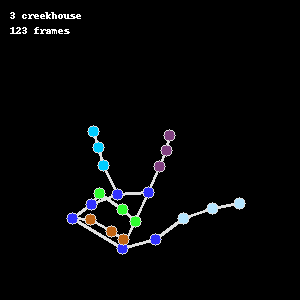

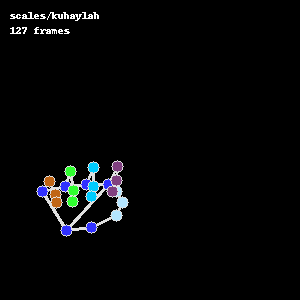

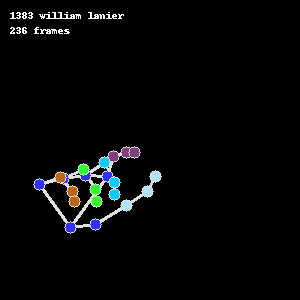

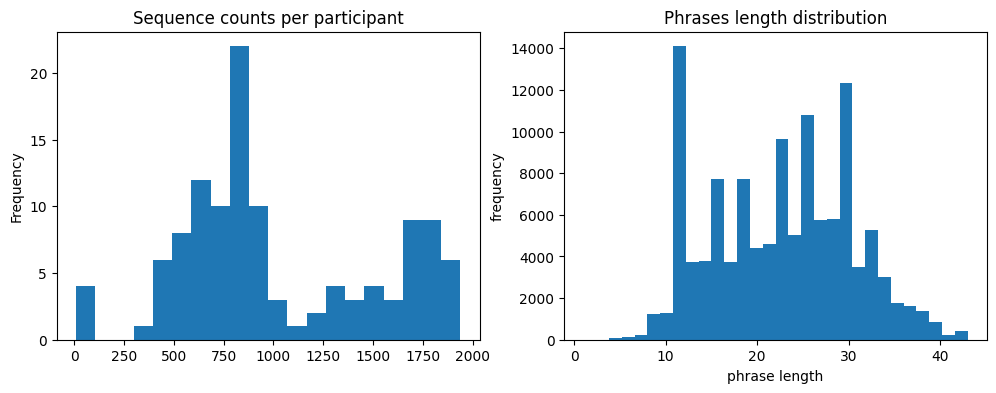

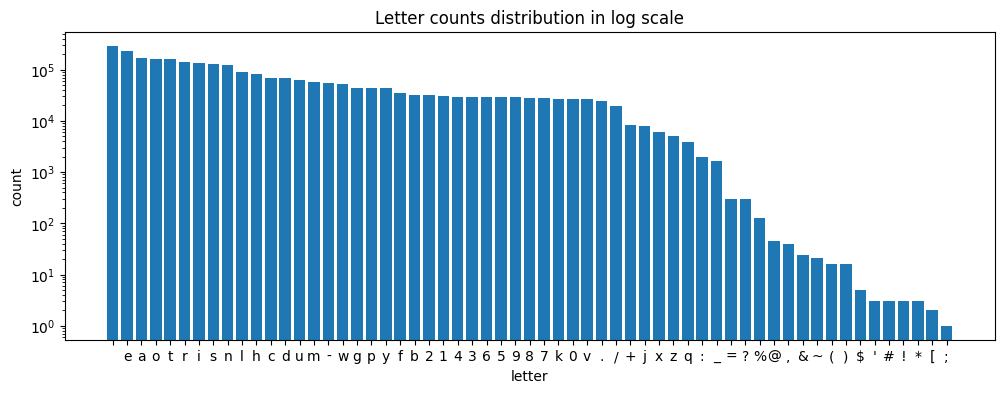

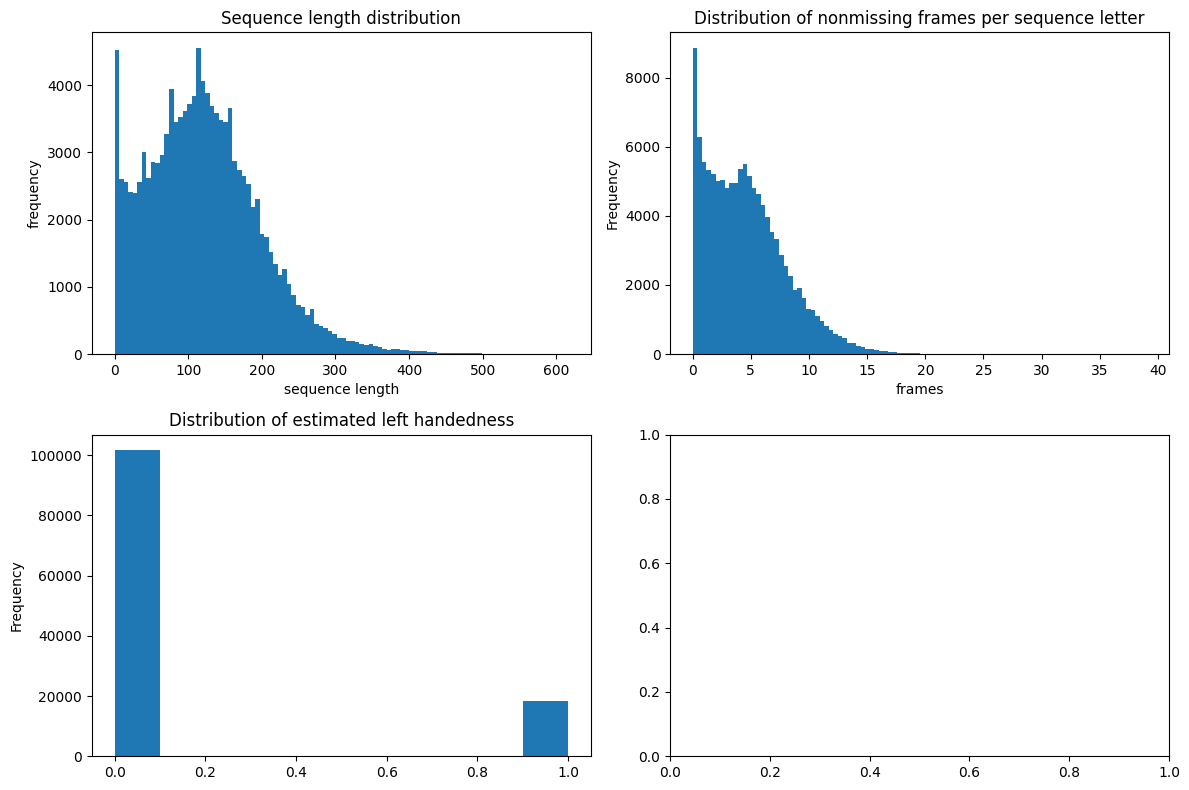

In [396]:
display_eda()

<div style="text-align: center;">
  <img src="media/hand-landmarks-with-bone-lengths.png" width="500">
</div>

In [438]:
def get_normalizing_3d_rotation(
    point_to_put_on_x_axis: torch.Tensor,
    point_to_put_in_positive_y_half_plane: torch.Tensor,
) -> torch.Tensor:
    first_basis = normalize(point_to_put_on_x_axis)
    second_basis = normalize(
        point_to_put_in_positive_y_half_plane
        - first_basis
        * (first_basis * point_to_put_in_positive_y_half_plane).sum(
            dim=-1, keepdim=True
        )
    )
    third_basis = torch.cross(first_basis, second_basis, dim=1)

    rotation = torch.inverse(
        torch.stack([first_basis, second_basis, third_basis], dim=1)
    )
    return rotation


class Finger(nn.Module):
    def __init__(self, 
                 sequence: torch.Tensor,
                 first_phalanx: torch.Tensor,
                 second_phalanx: torch.Tensor,
                 third_phalanx: torch.Tensor,
                ):
        super().__init__()
        
        assert sequence.shape[-2] == 4
        
        self.n_frames = len(sequence)
        self.first_phalanx = first_phalanx
        self.second_phalanx = second_phalanx
        self.third_phalanx = third_phalanx
        
        self.finger_base = nn.Parameter(sequence[:, [0]])
        
        first_joint_direction = sequence[:, 1] - sequence[:, 0]
        
        self.scale = nn.Parameter(first_joint_direction.norm(dim=-1) / first_phalanx).reshape(-1, 1, 1)
        
        self.first_joint_direction = nn.Parameter(first_joint_direction)
        self.second_joint_direction = nn.Parameter(sequence[:, 2] - sequence[:, 0])

        first = normalize(sequence[:, 1] - sequence[:, 0])
        second = normalize(sequence[:, 2] - sequence[:, 1])
        third = normalize(sequence[:, 3] - sequence[:, 2])
        self.first_joint_angle = nn.Parameter(torch.arccos((first * second).sum(dim=-1)))
        self.second_joint_angle = nn.Parameter(torch.arccos((second * third).sum(dim=-1)))

    def forward(self):
        rotation = get_normalizing_3d_rotation(
            self.first_joint_direction, self.second_joint_direction
        )
        inverse_rotation = torch.inverse(rotation)

        first_joint_angle = torch.clamp(
            self.first_joint_angle, min=-torch.pi / 2, max=3 * torch.pi / 4
        )
        second_joint_angle = torch.clamp(
            self.second_joint_angle, min=-torch.pi / 2, max=3 * torch.pi / 4
        )

        sequence = torch.zeros(self.n_frames, 4, 3)
        sequence[:, 1, 0] = self.first_phalanx
        sequence[:, 2, 0] = (
            sequence[:, 1, 0] + torch.cos(first_joint_angle) * self.second_phalanx
        )
        sequence[:, 2, 1] = torch.sin(first_joint_angle) * self.second_phalanx
        sequence[:, 3, 0] = (
            sequence[:, 2, 0]
            + torch.cos(first_joint_angle + second_joint_angle) * self.third_phalanx
        )
        sequence[:, 3, 1] = (
            sequence[:, 2, 1]
            + torch.sin(first_joint_angle + second_joint_angle) * self.third_phalanx
        )

        sequence @= inverse_rotation
        sequence *= self.scale
        sequence += self.finger_base

        assert (
            (sequence[:, 0] - sequence[:, 1]).norm(dim=-1) / self.scale.flatten()
        ).std() < 1e-3, "First edge length isn't invariant."
        assert (
            (sequence[:, 1] - sequence[:, 2]).norm(dim=-1) / self.scale.flatten()
        ).std() < 1e-3, "Second edge length isn't invariant."
        assert (
            (sequence[:, 2] - sequence[:, 3]).norm(dim=-1) / self.scale.flatten()
        ).std() < 1e-3, "Third edge length isn't invariant."
        assert torch.isclose(
            torch.tensor(0.),
            (
                torch.cross(
                    sequence[:, 1] - sequence[:, 0],
                    sequence[:, 2] - sequence[:, 0],
                    dim=-1,
                )
                * (sequence[:, 3] - sequence[:, 0])
            ).sum(dim=-1),
        ).all(), "Edges aren't in one plane."

        return sequence

In [ ]:
dataloader = torch.utils.data.DataLoader(Dataset(target_sequence_size=400), batch_size=16)

batch = next(iter(dataloader))
sequence = batch["sequence"][0, :batch["size"][0]]
display_video(draw_sequence_landmarks(sequence=sequence, phrase=batch["phrase"][0]))

In [442]:
finger = Finger(sequence[:, 1:5], first_phalanx=torch.tensor(46.2), 
                second_phalanx=torch.tensor(31.5),
                third_phalanx=torch.tensor(21.7))
sec = []
thi = []
ang = []
# optimizer = torch.optim.SGD(params=finger.parameters(), lr=1e-1, momentum=0.1)
optimizer = torch.optim.Adam(params=finger.parameters(), lr=1e-2)
for _ in range(1000):
#     sec.append(finger.second_edge.item())
#     thi.append(finger.third_edge.item())
    ang.append(finger.first_joint_angle[0].item())

    optimizer.zero_grad()
    pred_sequence = finger()
    true_sequence = sequence[:, [1, 2, 3, 4]]
    loss = (((pred_sequence - true_sequence)[:, :, [0, 1]]) ** 2).sum()
    loss.backward()
    optimizer.step()

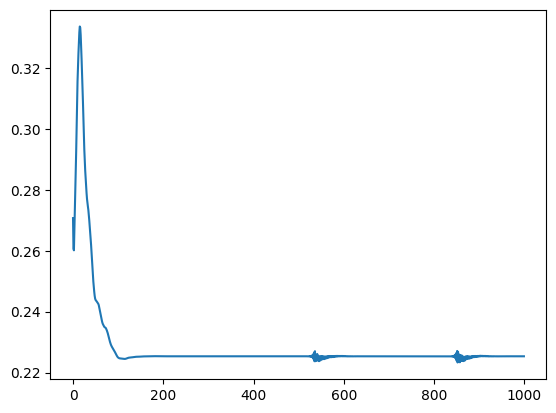

In [443]:
plt.plot(ang)

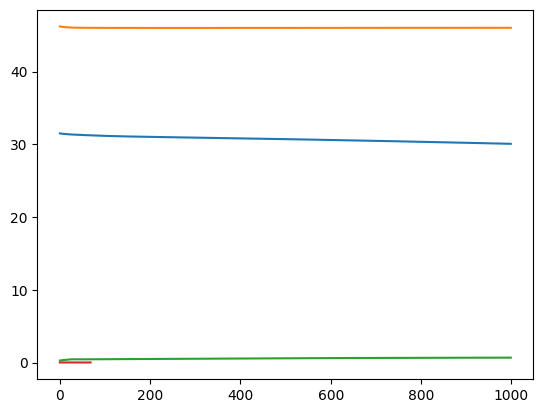

In [429]:
plt.plot(sec)
plt.plot(thi)
plt.plot(ang)
plt.plot(finger.scale.flatten().detach().numpy())

In [ ]:
a = (
    (sequence[:, 5] - sequence[:, 6]).norm(dim=-1)
    + (sequence[:, 6] - sequence[:, 7]).norm(dim=-1)
    + (sequence[:, 8] - sequence[:, 9]).norm(dim=-1)
)
b = (
    (sequence[:, 9] - sequence[:, 10]).norm(dim=-1)
    + (sequence[:, 10] - sequence[:, 11]).norm(dim=-1)
    + (sequence[:, 11] - sequence[:, 12]).norm(dim=-1)
)
plt.plot(a / b)

torch.quantile(sequence[:, 8], 0.5, dim=0), torch.std(sequence[:, 8])

plt.plot([:, 8, 0])
plt.axhline(0.6280)
plt.axhline(0.9720)

In [ ]:
# def normalizing_affine_transform_____(
#     hand_sequence: torch.Tensor,
#     origin_node: int = 0,
#     first_basis_node: int = 5,
#     first_second_basis_node: int = 17,
# ) -> torch.Tensor:
#     """
#     Scale, translate and rotate hand landmark sequence to transform
#     origin_node into (0, 0, 0), first_basis_node into (1, 0, 0) and
#     first_second_basis_node into (a, b, 0), where a**2 + b**2 = 1.
#     """

#     basis_bone_length = (
#         hand_sequence[:, [origin_node]] - hand_sequence[:, [first_basis_node]]
#     ).norm(dim=-1, keepdim=True)
#     hand_sequence /= basis_bone_length

#     def scale(hand_sequence, ks):
#         for finger_base, k in zip([1, 5, 9, 13, 17], ks):
#             for i in range(3):
#                 hand_sequence[:, finger_base + i + 1, 2] = hand_sequence[
#                     :, finger_base, 2
#                 ] + k * (
#                     hand_sequence[:, finger_base + i + 1, 2]
#                     - hand_sequence[:, finger_base, 2]
#                 )

#     def get_finger_length(hand_sequence, finger_base):
#         finger_length = 0
#         for i in range(3):
#             finger_length += (
#                 hand_sequence[:, finger_base + i]
#                 - hand_sequence[:, finger_base + i + 1]
#             ).norm(dim=-1)
#         return finger_length

#     def f(ks):
#         hs = hand_sequence.clone()
#         scale(hs, ks)

#         loss = 0
#         for finger_base, target_length in zip(
#             [1, 5, 9, 13, 17], [1.3, 0.1, 1.2, 1.1, 1.0]
#         ):  # [1.1, 0.95, 1.1, 1.0, 0.9]):
#             finger_length = get_finger_length(hs, finger_base)
#             loss += ((finger_length - target_length) ** 2).sum()
#         return loss

#     ks = torch.ones(5, len(hand_sequence), requires_grad=True)
#     for i in range(100):
#         loss = f(ks)
#         loss.backward()
#         with torch.no_grad():
#             ks -= ks.grad
#         ks.grad = None

#     #     print(get_finger_length(hand_sequence, 1))
#     scale(hand_sequence, ks)
#     #     print("After\n", get_finger_length(hand_sequence, 1))
#     hand_sequence = hand_sequence.detach()

#     hand_sequence -= hand_sequence[:, [origin_node]]

#     first_basis = hand_sequence[:, first_basis_node]
#     x = hand_sequence[:, first_second_basis_node]
#     second_basis = x - first_basis * (first_basis * x).sum(dim=-1, keepdim=True)
#     second_basis /= second_basis.norm(dim=-1, keepdim=True)
#     third_basis = torch.cross(first_basis, second_basis, dim=1)
#     rotation = torch.inverse(
#         torch.stack([first_basis, second_basis, third_basis], dim=1)
#     )
#     hand_sequence @= rotation

#     assert torch.isclose(rotation.det(), torch.tensor(1.0), atol=1e-3).all(), (
#         rotation,
#         rotation.det(),
#     )
#     assert torch.isclose(hand_sequence[:, origin_node], torch.tensor(0.0)).all()
#     assert torch.isclose(
#         hand_sequence[:, first_basis_node].norm(dim=-1), torch.tensor(1.0)
#     ).all()
#     assert torch.isclose(
#         hand_sequence[:, first_second_basis_node, -1], torch.tensor(0.0), atol=1e-6
#     ).all(), hand_sequence[:, first_second_basis_node, -1]

#     hand_sequence[:, :, 1] /= hand_sequence[:, [17], 1]
#     hand_sequence[:, :, 0] += hand_sequence[:, :, 1] * (0.6 - hand_sequence[:, [17], 0])
#     std = hand_sequence.std(dim=0)
#     low = hand_sequence.quantile(0.1, dim=0) - std / 2
#     high = hand_sequence.quantile(0.9, dim=0) + std / 2
#     hand_sequence = hand_sequence.clip(low, high)
#     hand_sequence[1:-1] = (
#         hand_sequence[2:] + hand_sequence[1:-1] + hand_sequence[:-2]
#     ) / 3
#     #     hand_sequence[2: -2] = (hand_sequence[4:] + hand_sequence[3:-1] + hand_sequence[2:-2] + hand_sequence[1:-3] + hand_sequence[:-4]) / 5

#     return hand_sequence

## Metrics <span id=Metrics_></span>

In [ ]:
def get_edit_distance(first: str, second: str) -> int:
    edit_distance = editdistance.distance(first, second)
    return edit_distance

## Hand model <span id=Hand_model_></span>

<div style="text-align: center;">
  <img src="media/hand-landmarks-with-bone-lengths.png" width="500">
</div>

In [ ]:
# 0, 5, 9, 13, 17 in one plane, 1 is elevated z = 15

In [49]:
15.8 / 22.4, 17.4 / 26.3, 17.3 / 25.5

(0.7053571428571429, 0.6615969581749048, 0.6784313725490196)

In [70]:
class HandModel(nn.Module):
    def __init__(sequence: torch.Tensor):
        #         n_frames = len(sequence)
        self.direction_0_5 = nn.Parameter(normalize(sequence[:, 5] - sequence[:, 0]))
        self.direction_0_17 = nn.Parameter(normalize(sequence[:, 5] - sequence[:, 0]))

In [39]:
mediapipe.solutions.hands_connections.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

## Hand model loss <span id=Hand_model_loss_></span>

In [83]:
# def get_bone_length_variation_loss(
#     sequence: torch.Tensor, basis_bone_edge: tuple[int, int] = (0, 5)
# ) -> torch.Tensor:
#     landmark_from, landmark_to = list(
#         zip(*mediapipe.solutions.hands_connections.HAND_CONNECTIONS)
#     )
#     bone_length = (sequence[:, landmark_from] - sequence[:, landmark_to]).norm(dim=-1)
#     basis_bone_length = (
#         sequence[:, [basis_bone_edge[0]]] - sequence[:, [basis_bone_edge[1]]]
#     ).norm(dim=-1)
#     bone_length = bone_length / basis_bone_length
#     loss = (bone_length.var(dim=0) / bone_length.mean(dim=0) ** 2).mean()
#     return loss


# def get_finger_plane_loss(sequence: torch.Tensor) -> torch.Tensor:
#     loss = 0
#     for finger_base in [1, 5, 9, 13, 17]:
#         finger = sequence[:, finger_base : finger_base + 4]
#         first_knuckle = finger[:, 0] - finger[:, 1]
#         second_knuckle = finger[:, 0] - finger[:, 2]
#         third_knuckle = finger[:, 0] - finger[:, 3]

#         normal_vector = torch.cross(first_knuckle, second_knuckle, dim=-1)
#         normal_vector = normal_vector / normal_vector.norm(dim=-1, keepdim=True)
#         distance_to_plane = torch.sum(normal_vector * third_knuckle, dim=-1).abs()
#         loss += (distance_to_plane**2).mean()

#     return loss


# def get_motion_smoothness_loss(
#     sequence: torch.Tensor,
#     second_degree_weight: float = 1.0,
#     relative_weight: float = 0.5,
# ) -> torch.Tensor:
#     loss = 0
#     hand_abs_delta = sequence[1:, 0] - sequence[:1, 0]
#     hand_abs_delta_delta = hand_abs_delta[1:] - hand_abs_delta[:1]
#     loss += (hand_abs_delta**2).sum(dim=-1).mean()
#     loss += second_degree_weight * (hand_abs_delta_delta**2).sum(dim=-1).mean()

#     for finger in [4, 8, 12, 16, 20]:
#         finger_rel_delta = sequence[1:, finger] - sequence[:1, finger] - hand_abs_delta
#         finger_rel_delta_delta = finger_rel_delta[1:] - finger_rel_delta[:1]
#         loss += relative_weight * (finger_rel_delta**2).sum(dim=-1).mean()
#         loss += (
#             relative_weight
#             * second_degree_weight
#             * (finger_rel_delta_delta**2).sum(dim=-1).mean()
#         )

#     return loss


# def get_distance_from_true_sequence_loss(
#     true_sequence: torch.Tensor, pred_sequence: torch.Tensor, mask: torch.Tensor
# ) -> torch.Tensor:
#     """The loss is equal to masked l1 distance to account for outliers."""
#     loss = nn.functional.l1_loss(pred_sequence[mask], true_sequence[mask])
#     return loss


# def get_hand_model_loss(
#     true_sequence: torch.Tensor,
#     pred_sequence: torch.Tensor,
#     mask: torch.Tensor,
#     bone_length_variation_weight: float = 1.0,
#     finger_plane_weight: float = 1.0,
#     motion_smoothness_weight: float = 1.0,
#     distance_from_true_sequence_weight: float = 1.0,
# ) -> torch.Tensor:
#     if true_sequence.shape != pred_sequence.shape:
#         raise ValueError(
#             f"Shapes don't match: {true_sequence.shape} != {pred_sequence.shape}"
#         )
#     shape_dict = einops.parse_shape(true_sequence, "frame landmark coordinate")

#     bone_length_variation_loss = (
#         bone_length_variation_weight * get_bone_length_variation_loss(pred_sequence)
#     )
#     finger_plane_loss = finger_plane_weight * get_finger_plane_loss(pred_sequence)
#     motion_smoothness_loss = motion_smoothness_weight * get_motion_smoothness_loss(
#         pred_sequence
#     )
#     distance_from_true_sequence_loss = (
#         distance_from_true_sequence_weight
#         * get_distance_from_true_sequence_loss(true_sequence, pred_sequence, mask)
#     )

#     loss = (
#         bone_length_variation_loss
#         + finger_plane_loss
#         + motion_smoothness_loss
#         + distance_from_true_sequence_loss
#     )
#     return loss

In [84]:
# because videos are from a phone, the perspective is skewed and bones do not necessarily have invariant proportions
# augmentations: concat several sequences
# check out different scipy interpolation methods and respective losses
# set up wandb logger
# log each loss separately, check losses on sklearn interpolators
# augmentations
# scale loss inverse according to fraction of missing frames

## Dataset <span id=Dataset_></span>

In [93]:
# class BatchSampler:
#     """Samples batches of sequences from same parquet file to speed up loading."""

#     def __init__(
#         self,
#         folder: str | None = None,
#         sequence_ids: list[int] | None = None,
#         batch_size: int = 16,
#         shuffle: bool = False,
#     ):
#         self.train = read_train_dataframe(folder)
#         if sequence_ids is not None:
#             self.train = self.train.loc[sequence_ids]
#         self.batch_size = batch_size
#         self.shuffle = shuffle

#     def __len__(self):
#         return len([i for i in self])

#     def __iter__(self):
#         batch_indices = []
#         for path, sequence_ids in self.train.reset_index().groupby("path")[
#             "sequence_id"
#         ]:
#             n_sub_batches = int(np.ceil(len(sequence_ids) / self.batch_size))
#             batched_sequence_ids = np.array_split(sequence_ids.values, n_sub_batches)
#             if self.shuffle:
#                 np.random.shuffle(batched_sequence_ids)
#             batch_indices.extend(batched_sequence_ids)

#         if self.shuffle:
#             np.random.shuffle(batch_indices)

#         yield from batch_indices


# class Dataset(torch.utils.data.Dataset):
#     def __init__(
#         self,
#         folder: str | None = None,
#         sequence_df_transform: tp.Callable[
#             [pd.DataFrame], dict[str, torch.Tensor]
#         ] = preprocess_sequence_dataframe,
#         sequence_ids: list[int] | None = None,
#     ):
#         self.folder = folder
#         self.train = read_train_dataframe(folder)
#         self.len = len(train) if sequence_ids is None else len(sequence_ids)
#         self.columns = (
#             ["frame"]
#             + get_all_bodypart_columns(Bodypart.right_hand)
#             + get_all_bodypart_columns(Bodypart.left_hand)
#         )
#         self.sequence_df_transform = sequence_df_transform
#         self.sequence_df: pd.DataFrame | None = None

#     def __len__(self) -> int:
#         return self.len

#     def __getitem__(self, sequence_id: int) -> dict:
#         if self.sequence_df is None or sequence_id not in self.sequence_df.index:
#             self.sequence_df = read_parquet_as_dataframe(
#                 folder=self.folder,
#                 parquet_path=self.train.loc[sequence_id]["path"],
#                 columns=self.columns,
#             )

#         sequence_df = self.sequence_df.loc[sequence_id]
#         sequence_dict = self.sequence_df_transform(sequence_df)
#         sequence_dict["sequence_id"] = sequence_id
#         sequence_dict["phrase"] = self.train.loc[sequence_id]["phrase"]

#         return sequence_dict

## Model <span id=Model_></span>

In [108]:
class HandModelInterpolator(nn.Module):
    def __init__(self, window_size: int = 11):
        super().__init__()
        self.conv1d = nn.Conv1d(
            in_channels=63, out_channels=63, kernel_size=window_size, padding="same"
        )

    def forward(self, sequence):
        sequence = torch.flatten(sequence, start_dim=-2, end_dim=-1)
        sequence = sequence.transpose(1, 2)  # batch, landmark x coordinate, frame
        sequence = sequence + 1e-5 * self.conv1d(sequence)
        sequence = sequence.transpose(1, 2)
        sequence = torch.unflatten(sequence, dim=-1, sizes=(-1, 3))
        return sequence

In [164]:
class Module(pl.LightningModule):
    def __init__(self, window_size: int = 11):
        super().__init__()
        self.interpolator = HandModelInterpolator(window_size=window_size)

    def forward(self, sequence):
        pred_sequence = self.interpolator(sequence)
        return pred_sequence

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

    def training_step(self, batch, batch_index):
        sequence = batch["sequence"]
        mask = batch["mask"]
        pred_sequence = self(sequence)

        bone_length_variation_loss = 0.0
        finger_plane_loss = 0.0
        motion_smoothness_loss = 0.0
        distance_from_true_sequence_loss = 0.0
        for s, p, m in zip(sequence, pred_sequence, mask):
            bone_length_variation_loss += get_bone_length_variation_loss(p)
            finger_plane_loss += 1000 * get_finger_plane_loss(p)
            #             motion_smoothness_loss += get_motion_smoothness_loss(p)
            distance_from_true_sequence_loss += (
                1000 * get_distance_from_true_sequence_loss(s, p, m)
            )

        loss = (
            bone_length_variation_loss
            + finger_plane_loss
            + motion_smoothness_loss
            + distance_from_true_sequence_loss
        )

        self.log("bone_length_variation_loss", bone_length_variation_loss)
        self.log("finger_plane_loss", finger_plane_loss)
        self.log("motion_smoothness_loss", motion_smoothness_loss)
        self.log("distance_from_true_sequence_loss", distance_from_true_sequence_loss)
        self.log("loss", loss)

        return loss

    def validation_step(self, batch, batch_index):
        ...

In [165]:
class VideoCallback(pl.callbacks.Callback):
    def on_validation_batch_start(
        self, trainer, pl_module, batch, batch_index, dataloader_index=0
    ):
        if batch_index == 0:
            i = 0
            sequence_id = batch["sequence_id"][i].item()
            pred_sequence = pl_module(batch["sequence"])
            pred_sequence = pred_sequence[i, : batch["size"][i]]
            pred_sequence = pred_sequence.detach().numpy()
            video = draw_sequence_landmarks(
                sequence=pred_sequence,
                sequence_id=sequence_id,
                bodypart=Bodypart.right_hand,
            )
            with tempfile.NamedTemporaryFile(suffix=".gif") as gif:
                filename = gif.name
                write_gif(filename, video)
                wandb.log({"video": wandb.Video(filename)})

In [415]:
meta = read_aggregated_meta_dataframe()
train_dataloader, val_dataloader, test_dataloader = next(
    iter(
        get_stratified_k_fold_dataloaders(
            get_stratified_k_fold_sequences(
                sequence_ids=meta[meta["not_na_frames_per_letter"] > 1].index.values
            ),
            num_workers=4,
        )
    )
)

In [166]:
model = Module(window_size=11)
trainer = pl.Trainer(
    logger=pl.loggers.WandbLogger(project="asl-fingerspelling"),
    callbacks=[VideoCallback()],
    log_every_n_steps=10,
    val_check_interval=1000,
    limit_val_batches=1,
)
trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)
wandb.finish()

wandb: Currently logged in as: dkoshman. Use `wandb login --relogin` to force relogin


/opt/conda/lib/python3.10/site-packages/pytorch_lightning/loops/utilities.py:70: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


bone_length_variation_loss,█▂▃▁▂▂▃▂▂▂▂▂▂▂▂▃▁▁▃▂▅▃▄▂▃▂▂▃▃▂▂▃▄▂▁▄▂▂▂▂
distance_from_true_sequence_loss,█▅▄▄▂▃▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
finger_plane_loss,▄▃▅▂▂▅▆▅▃▅▇▃▄▄▃▄▁▁▇▅▅▂▅▅▄▄▃▆▄▁▆█▆▅▄▇▃▃▅▅
loss,▇▃▆▂▃▅▆▅▃▅▆▃▄▄▃▅▁▁▇▅▆▃▆▅▄▄▃▆▄▂▆█▆▅▄█▃▃▅▅
motion_smoothness_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
bone_length_variation_loss,0.24729
distance_from_true_sequence_loss,0.00276
epoch,0
finger_plane_loss,1.0463


In [168]:
# enforce bone stability and finger plane via strict model, not via loss,
# model is too simple, training too slow

In [167]:
# sequence_df=read_parquet_as_dataframe(
#         parquet_path="train_landmarks/5414471.parquet",
#         sequence_ids=[1816796431],
#         columns=["frame"] + get_all_bodypart_columns(Bodypart.right_hand) + get_all_bodypart_columns(Bodypart.left_hand),
#     ).iloc[:50]
# column = "x_right_hand_8"
# y = sequence_df[column].values
# x = np.arange(len(y))
# notnan = ~np.isnan(y)

# akima_interpolator = scipy.interpolate.Akima1DInterpolator(x=x[notnan], y=y[notnan])
# univariate_interpolator = scipy.interpolate.UnivariateSpline(x=x[notnan], y=y[notnan], s=1e-3)
# rbf_interpolator = scipy.interpolate.Rbf(x[notnan], y[notnan])

# plt.title("Interpolation")
# plt.xlabel("frame")
# plt.ylabel(column)
# plt.ylabel("coordinate")
# plt.plot(akima_interpolator(x), label="akima_interpolator")
# plt.plot(univariate_interpolator(x), label="univariate_interpolator")
# plt.plot(rbf_interpolator(x), label="rbf_interpolator")
# plt.plot(y, "o", label="original")
# plt.legend();